# Homework 3

In [44]:
from sklearn import linear_model,metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from datetime import datetime
from sklearn.metrics import accuracy_score

In [54]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [55]:
def builtup(df):
    markup =[0]
    for i in range(len(df['Close Price'])-1):
        if df['Close Price'][i+1] > df['Close Price'][i]:
            markup.append(1)
        else:
            markup.append(0)
    df['Mark Up'] = pd.DataFrame(markup)
    return df
train = builtup(train)
test = builtup(test)

In [56]:
ID = 20 #Inference Day
def infer(df):
    inference=[]
    for i in range(df.shape[0]-ID):
        intermediation = np.asarray(df.loc[i:i+ID-1]['Mark Up'])
        inference.append(intermediation)
    return inference
inferences_x = np.asarray(infer(train))
print(inferences_x.shape)
train_y = train['Mark Up'].values
train_y = train_y[ID:]
print(train_y.shape)

test_inf_x = np.asarray(infer(test))
print(test_inf_x.shape)
test_y = test['Mark Up'].values
test_y = test_y[ID:]
print(test_y.shape)

(2244, 20)
(2244,)
(232, 20)
(232,)


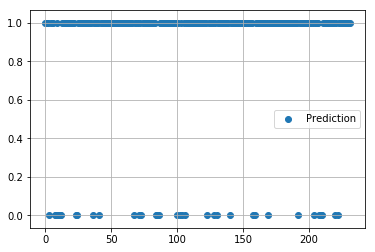

Accuracy = 50.00%


In [58]:
classification = linear_model.LogisticRegression(solver='lbfgs')
classification.fit(inferences_x,train_y)
prediction_y = classification.predict(test_inf_x)
plt.scatter(range(len(prediction_y)),prediction_y,label='Prediction')

plt.grid()
plt.legend()
plt.show()
acc_rate = accuracy_score(test_y,prediction_y) * 100
print('Accuracy = %.2f%%' % acc_rate)

In [63]:
from sklearn.svm import SVC

In [65]:
svm =SVC(C = 0.05,kernel = 'linear',probability = True)
svm.fit(inferences_x , train_y)

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

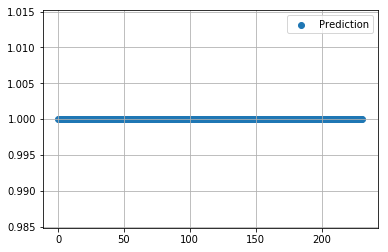

In [69]:
prediction_y = svm.predict(test_inf_x)
plt.scatter(range(len(prediction_y)),prediction_y,label='Prediction')
plt.grid()
plt.legend()
plt.show()
